In [1]:
# Copyright (C) 2023 Intel Corporation
#
# SPDX-License-Identifier: MIT

import datumaro as dm
from datumaro.components.prune import Prune
from datumaro.components.visualizer import Visualizer
from datumaro.plugins.validators import ClassificationValidator

from matplotlib import pyplot as plt

/home/dwekr/miniconda3/envs/datum/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = dm.Dataset.import_from("/media/hdd2/datumaro/cifar100_test", format="cifar")
dataset

Dataset
	size=9999
	source_path=/media/hdd2/datumaro/cifar100_test
	media_type=<class 'datumaro.components.media.Image'>
	annotated_items_count=9999
	annotations_count=9999
subsets
	test: # of items=9999, # of annotated items=9999, # of annotations=9999, annotation types=['label']
infos
	categories
	label: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon',

In [3]:
labels = list([label._indices.keys() for label in dataset.categories().values()][0])

In [5]:
validator = ClassificationValidator()
reports = validator.validate(dataset)

In [6]:
reports['statistics']

{'label_distribution': {'defined_labels': {'apple': 100,
   'aquarium_fish': 100,
   'baby': 100,
   'bear': 100,
   'beaver': 100,
   'bed': 100,
   'bee': 100,
   'beetle': 100,
   'bicycle': 100,
   'bottle': 100,
   'bowl': 100,
   'boy': 100,
   'bridge': 100,
   'bus': 100,
   'butterfly': 100,
   'camel': 100,
   'can': 100,
   'castle': 100,
   'caterpillar': 100,
   'cattle': 100,
   'chair': 100,
   'chimpanzee': 100,
   'clock': 100,
   'cloud': 100,
   'cockroach': 100,
   'couch': 100,
   'crab': 100,
   'crocodile': 100,
   'cup': 100,
   'dinosaur': 100,
   'dolphin': 100,
   'elephant': 100,
   'flatfish': 100,
   'forest': 100,
   'fox': 100,
   'girl': 99,
   'hamster': 100,
   'house': 100,
   'kangaroo': 100,
   'keyboard': 100,
   'lamp': 100,
   'lawn_mower': 100,
   'leopard': 100,
   'lion': 100,
   'lizard': 100,
   'lobster': 100,
   'man': 100,
   'maple_tree': 100,
   'motorcycle': 100,
   'mountain': 100,
   'mouse': 100,
   'mushroom': 100,
   'oak_tree': 

In [7]:
reports["statistics"].keys()

dict_keys(['label_distribution', 'attribute_distribution', 'total_ann_count', 'items_missing_annotation', 'items_with_multiple_labels'])

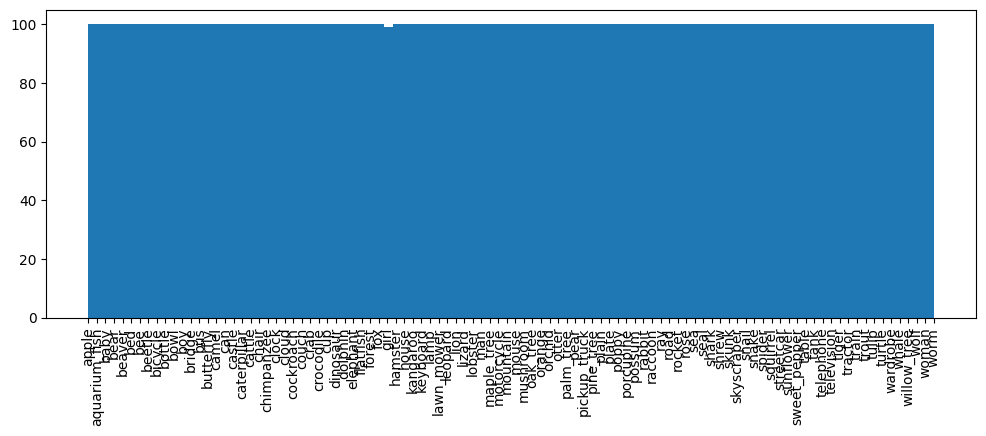

In [8]:
stats = reports["statistics"]

label_stats = stats["label_distribution"]["defined_labels"]
label_name, label_counts = zip(*[(k, v) for k, v in label_stats.items()])

plt.figure(figsize=(12, 4))
plt.hist(label_name, weights=label_counts, bins=len(label_name))
plt.xticks(rotation="vertical")
plt.show()

In [9]:
prune = Prune(dataset, cluster_method='random')
random_result = prune.get_pruned(0.5)

In [14]:
random_reports = validator.validate(random_result[0])

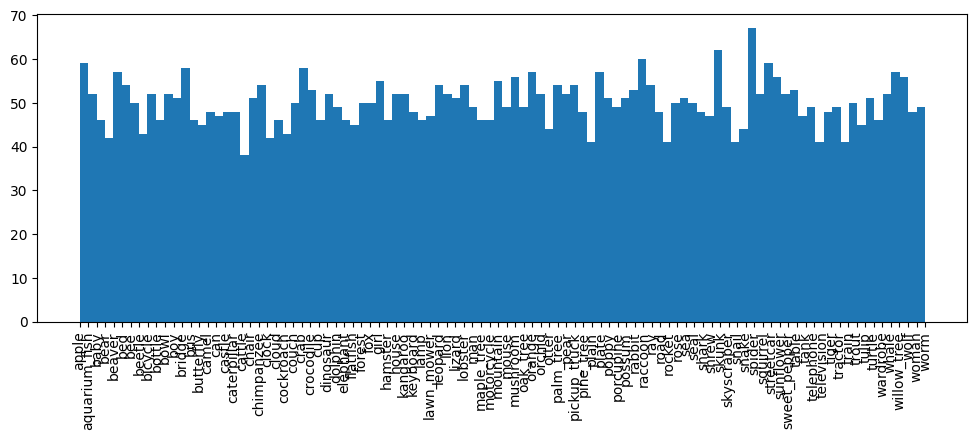

In [15]:
random_stats = random_reports["statistics"]

label_stats = random_stats["label_distribution"]["defined_labels"]
label_name, label_counts = zip(*[(k, v) for k, v in label_stats.items()])

plt.figure(figsize=(12, 4))
plt.hist(label_name, weights=label_counts, bins=len(label_name))
plt.xticks(rotation="vertical")
plt.show()

In [16]:
prune = Prune(dataset, cluster_method='cluster_random')
cluster_random_result = prune.get_pruned(0.5)

In [17]:
cluster_random_reports = validator.validate(cluster_random_result[0])

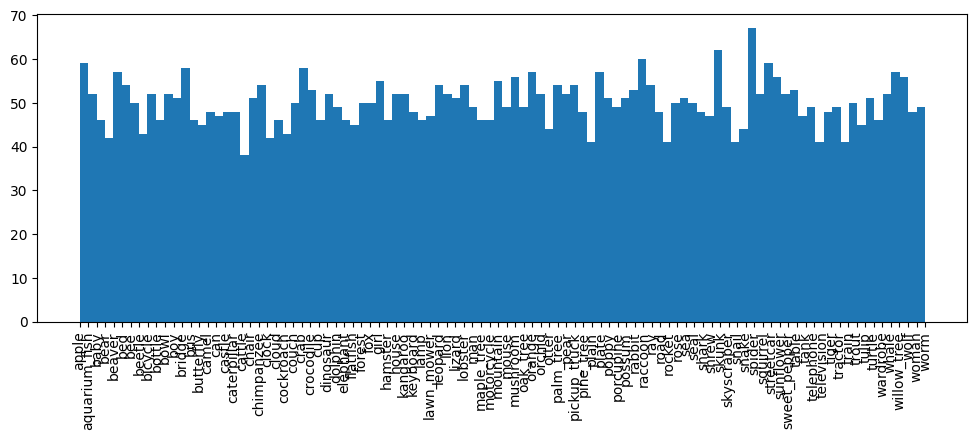

In [18]:
cluster_random_stats = cluster_random_reports["statistics"]

label_stats = cluster_random_stats["label_distribution"]["defined_labels"]
label_name, label_counts = zip(*[(k, v) for k, v in label_stats.items()])

plt.figure(figsize=(12, 4))
plt.hist(label_name, weights=label_counts, bins=len(label_name))
plt.xticks(rotation="vertical")
plt.show()

In [19]:
prune = Prune(dataset, cluster_method='query_clust')
query_clust_result = prune.get_pruned(0.5)

In [20]:
query_clust_reports = validator.validate(query_clust_result[0])

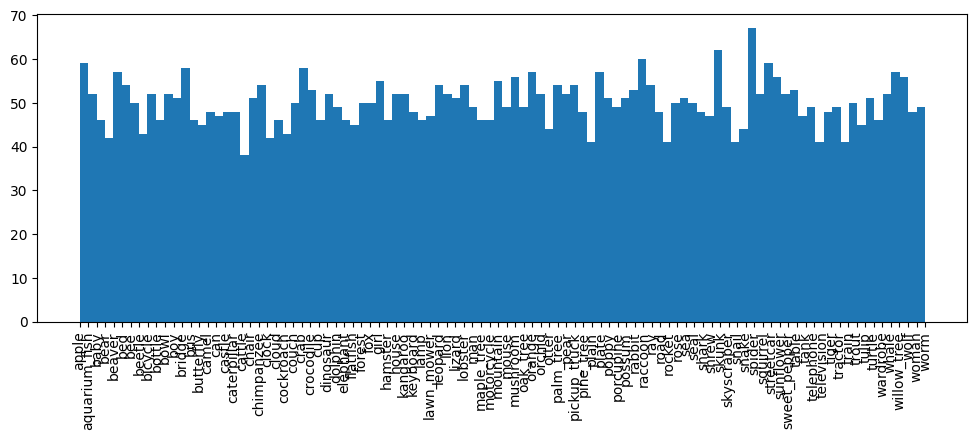

In [21]:
query_clust_stats = query_clust_reports["statistics"]

label_stats = query_clust_stats["label_distribution"]["defined_labels"]
label_name, label_counts = zip(*[(k, v) for k, v in label_stats.items()])

plt.figure(figsize=(12, 4))
plt.hist(label_name, weights=label_counts, bins=len(label_name))
plt.xticks(rotation="vertical")
plt.show()

In [22]:
prune = Prune(dataset, cluster_method='centroid')
centroid_result = prune.get_pruned(0.5)

In [23]:
centroid_reports = validator.validate(centroid_result[0])

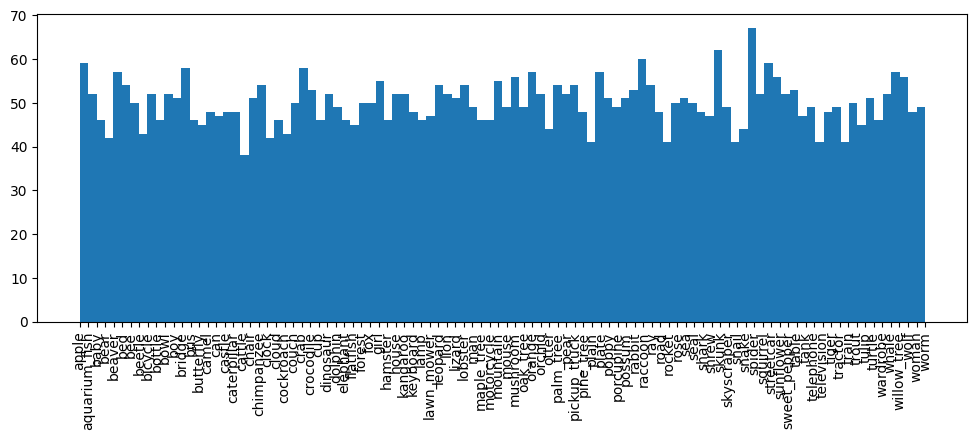

In [24]:
centroid_stats = centroid_reports["statistics"]

label_stats = centroid_stats["label_distribution"]["defined_labels"]
label_name, label_counts = zip(*[(k, v) for k, v in label_stats.items()])

plt.figure(figsize=(12, 4))
plt.hist(label_name, weights=label_counts, bins=len(label_name))
plt.xticks(rotation="vertical")
plt.show()

In [25]:
prune = Prune(dataset, cluster_method='entropy')
entropy_result = prune.get_pruned(0.5)

In [26]:
entropy_reports = validator.validate(entropy_result[0])

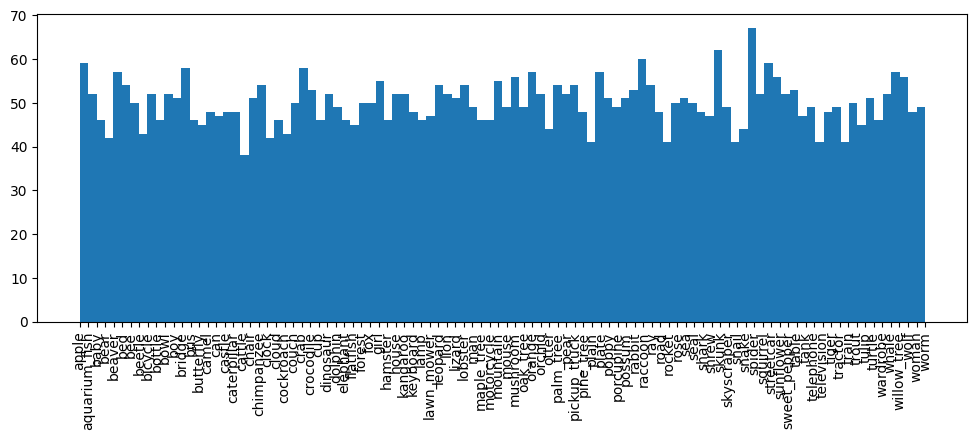

In [27]:
entropy_stats = entropy_reports["statistics"]

label_stats = entropy_stats["label_distribution"]["defined_labels"]
label_name, label_counts = zip(*[(k, v) for k, v in label_stats.items()])

plt.figure(figsize=(12, 4))
plt.hist(label_name, weights=label_counts, bins=len(label_name))
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
prune = Prune(dataset, cluster_method='ndr')
ndr_result = prune.get_pruned(0.5)

In [ ]:
ndr_reports = validator.validate(ndr_result[0])

In [ ]:
ndr_stats = ndr_reports["statistics"]

label_stats = ndr_stats["label_distribution"]["defined_labels"]
label_name, label_counts = zip(*[(k, v) for k, v in label_stats.items()])

plt.figure(figsize=(12, 4))
plt.hist(label_name, weights=label_counts, bins=len(label_name))
plt.xticks(rotation="vertical")
plt.show()